In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Pre-processing

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df = df.drop(['availability','society'],axis=1)

In [8]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df['balcony'] = df['balcony'].fillna(0)

In [10]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df = df.dropna()
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df[df['bhk']>20]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df[~df['total_sqft'].apply(isfloat)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        if 'Sq. Meter' in x:
            x = x.replace('Sq. Meter','')
            return float(x)*10.7639
        elif 'Acres' in x:
            x = x.replace('Acres','')
            return float(x)*43560
        elif 'Guntha' in x:
            x = x.replace('Guntha','')
            return float(x)*1089
        elif 'Sq. Yards' in x:
            x = x.replace('Sq. Yards','')
            return float(x)*9

In [19]:
df1 = df.copy() # incase data set gets messed up
df1['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [20]:
df1

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,0.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [21]:
df1 = df1.drop(['size','area_type'],axis=1)

In [22]:
df1

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [23]:
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']

In [24]:
df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [25]:
location_stats=df1['location'].value_counts().sort_values(ascending=False)
location_stats

Whitefield                534
Sarjapur  Road            392
Electronic City           302
Kanakpura Road            266
Thanisandra               233
                         ... 
Rajarajesheari nagar        1
Millers Road                1
Pillahalli                  1
Yelahanka,MVIT college      1
Abshot Layout               1
Name: location, Length: 1304, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1063

In [27]:
location_less_than_10 =location_stats[location_stats<=10]
location_less_than_10

Dairy Circle              10
Kalkere                   10
Dodsworth Layout          10
Naganathapura             10
Nagadevanahalli           10
                          ..
Rajarajesheari nagar       1
Millers Road               1
Pillahalli                 1
Yelahanka,MVIT college     1
Abshot Layout              1
Name: location, Length: 1063, dtype: int64

In [28]:
df1['location'] = df1['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [29]:
df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [30]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Yeshwant

# Outlier Detection and removal

In [31]:
df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [32]:
df1[df1['total_sqft']/df1['bhk']<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,0.0,218.0,7,15571.428571
13279,other,1200.0,5.0,0.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [33]:
df2= df1[~(df1['total_sqft']/df1['bhk']<300)]

In [34]:
df2.shape

(12499, 7)

In [35]:
df2['price_per_sqft'].describe()

count     12495.000000
mean       6300.244911
std        4168.699547
min           2.257423
25%        4204.689902
50%        5291.005291
75%        6916.831357
max      176470.588235
Name: price_per_sqft, dtype: float64

C:\Users\knock\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

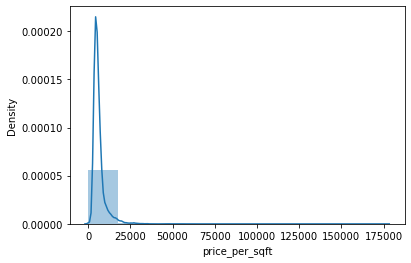

In [36]:
sns.distplot(df2['price_per_sqft'],bins=10,kde=True)

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std= np.std(subdf['price_per_sqft'])
        reduce_df = subdf[(subdf['price_per_sqft']>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

In [38]:
final_df = remove_pps_outliers(df2)

In [39]:
final_df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10264,other,1353.0,2.0,2.0,110.00,2,8130.081301
10265,other,812.0,1.0,0.0,26.00,1,3201.970443
10266,other,1440.0,2.0,2.0,63.93,3,4439.583333
10267,other,1075.0,2.0,2.0,48.00,2,4465.116279


In [40]:
final_df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000
mean,1572.728336,2.474340,1.543383,91.063146,2.571721,5656.787815
std,6501.923646,0.981941,0.831190,86.230151,0.896495,2264.657290
min,300.000000,1.000000,0.000000,10.000000,1.000000,33.210897
25%,1107.830000,2.000000,1.000000,49.000000,2.000000,4242.424242
50%,1282.000000,2.000000,2.000000,67.000000,2.000000,5175.159236
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6428.571429
max,653400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


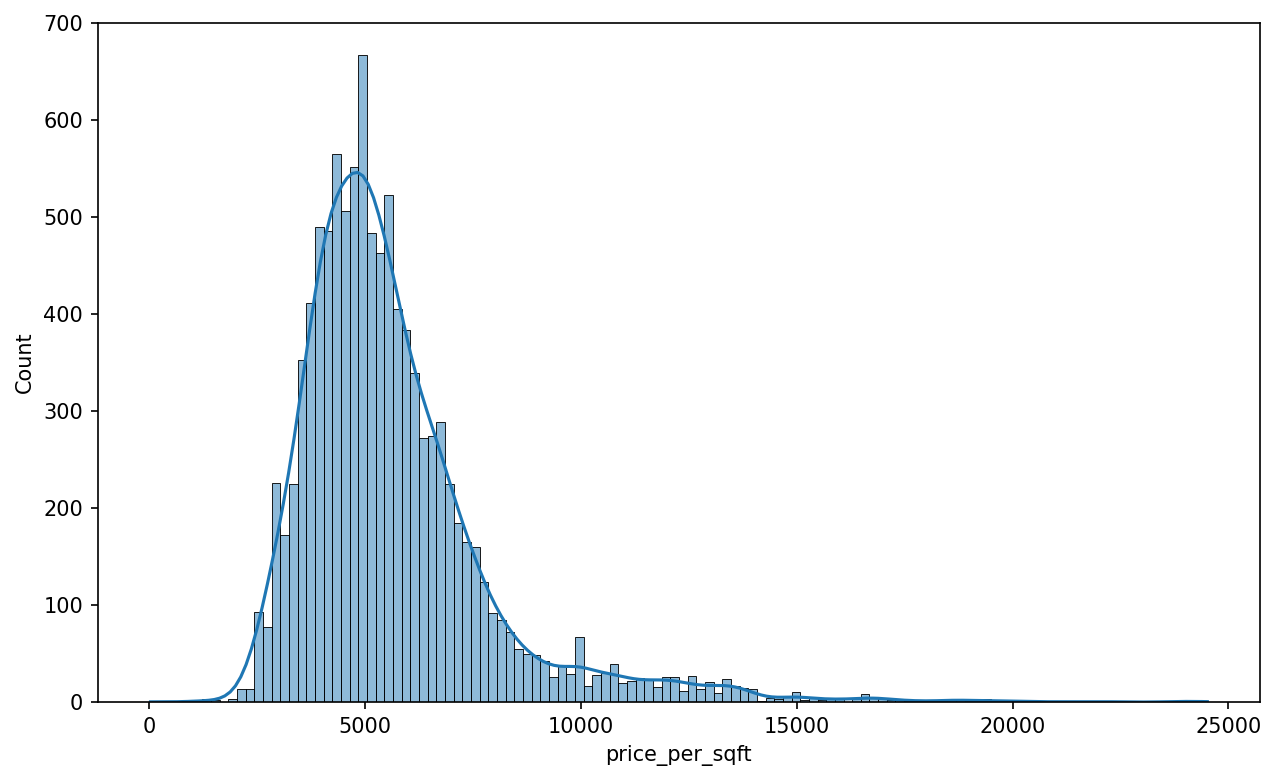

In [41]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(final_df['price_per_sqft'],kde=True);

In [42]:
final_df=final_df[~(final_df['total_sqft']>10000)]

In [43]:
final_df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10264,other,1353.0,2.0,2.0,110.00,2,8130.081301
10265,other,812.0,1.0,0.0,26.00,1,3201.970443
10266,other,1440.0,2.0,2.0,63.93,3,4439.583333
10267,other,1075.0,2.0,2.0,48.00,2,4465.116279


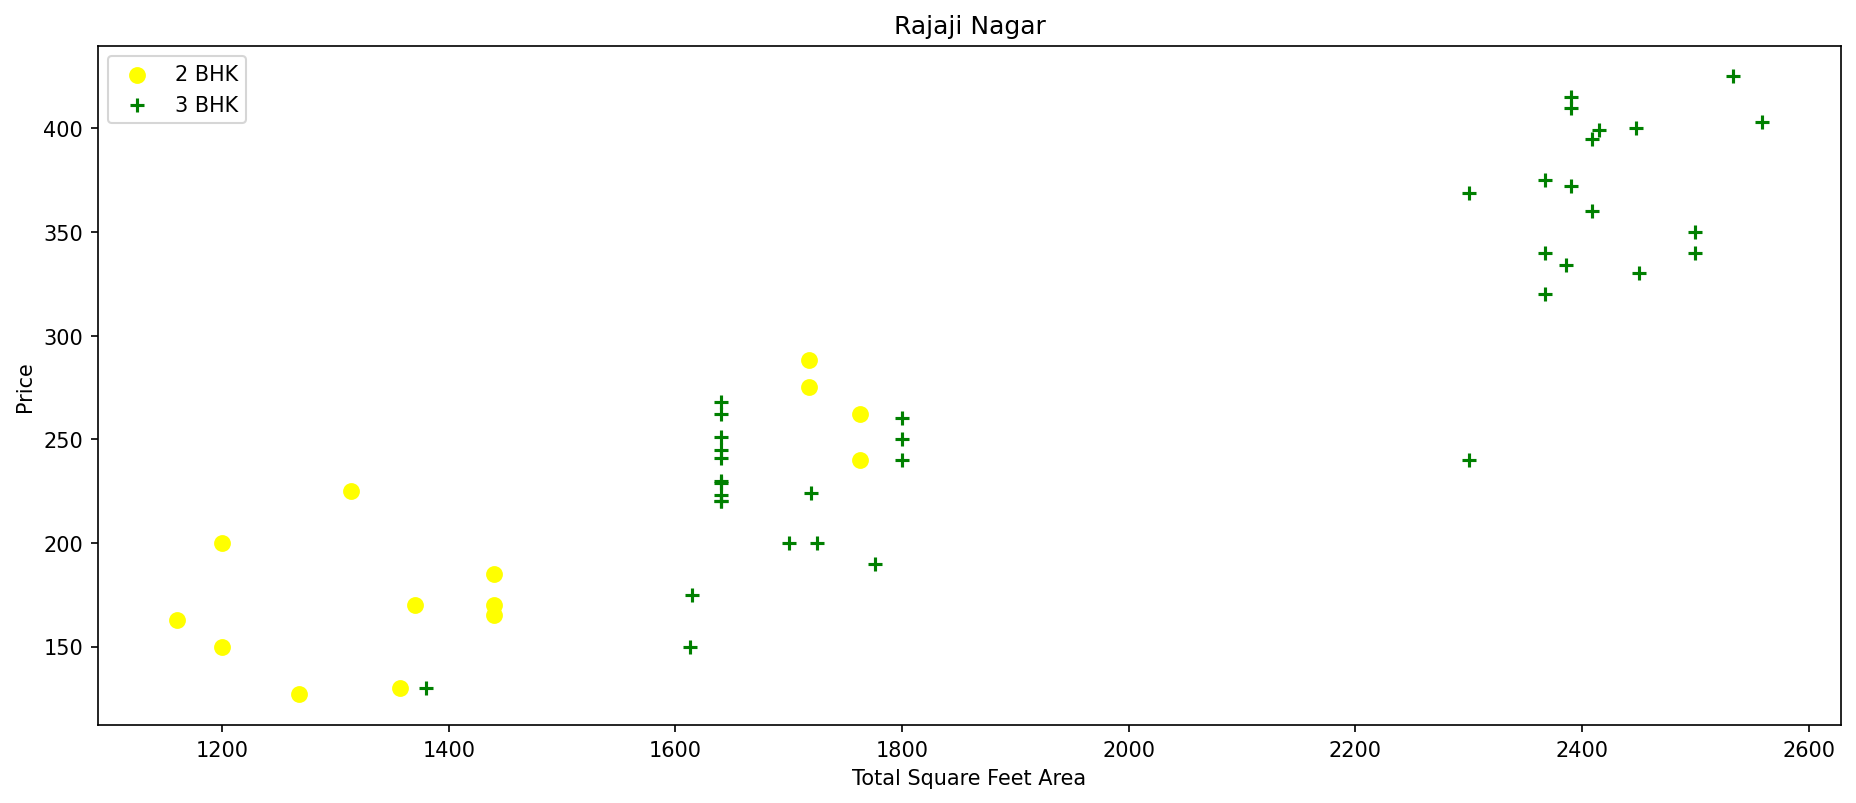

In [44]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,6)
    plt.figure(figsize=(15,6),dpi=150)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='yellow',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(final_df,'Rajaji Nagar')

In [45]:
# here we can see with two bedrooms same area are costing same or more than three bedrooms apartment

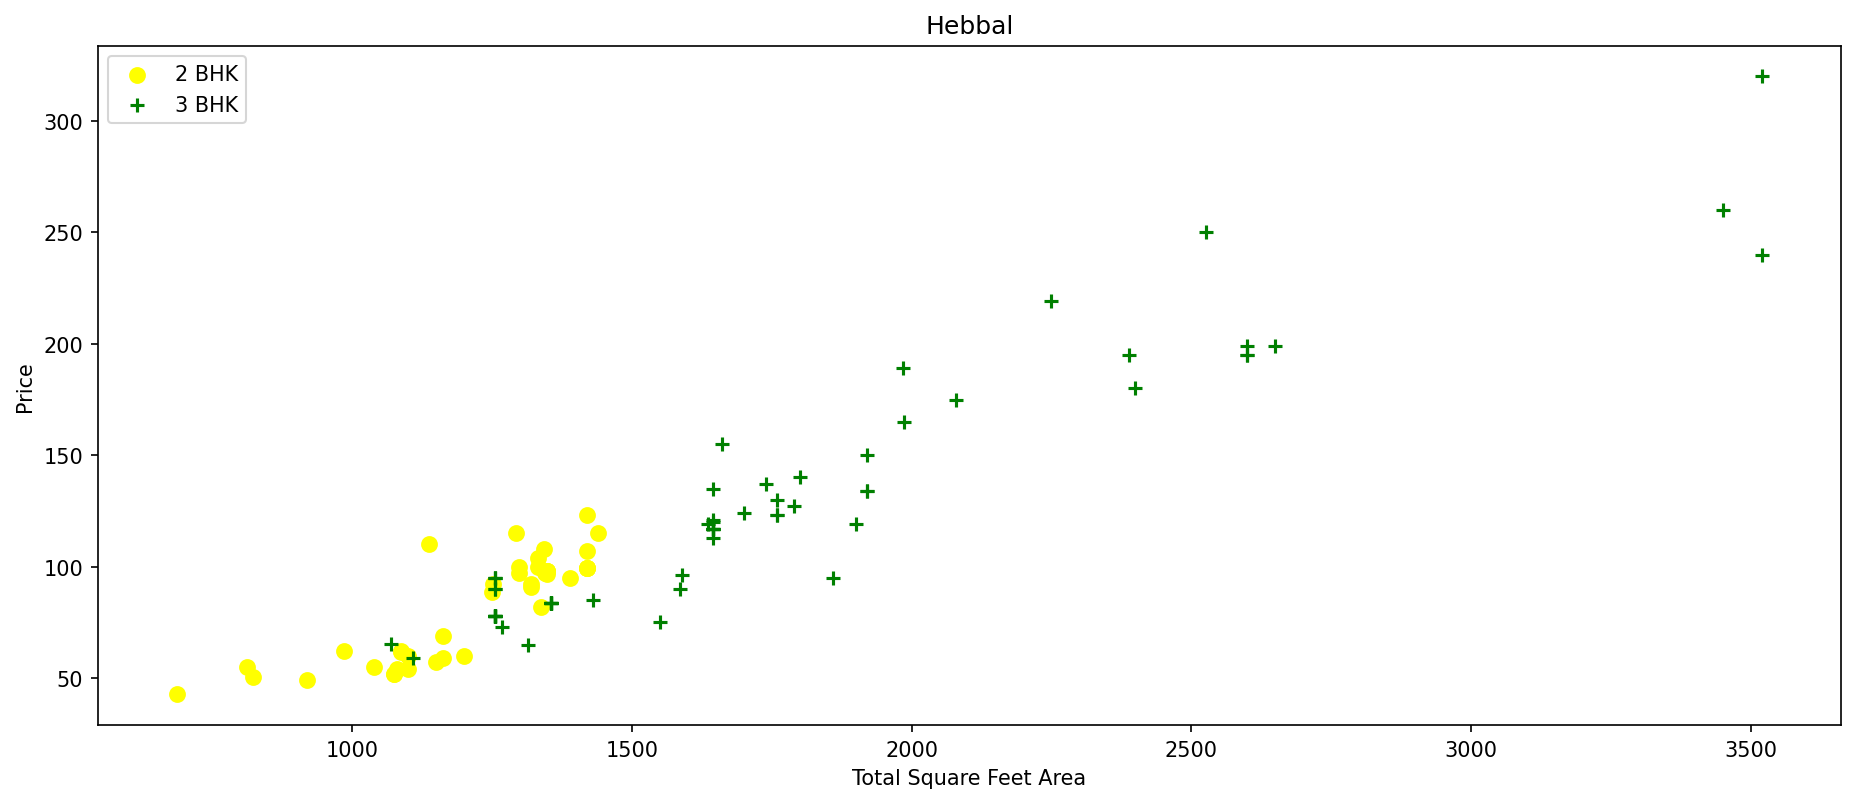

In [46]:
plot_scatter_chart(final_df,'Hebbal')

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)

In [48]:
final_df1 = remove_pps_outliers(final_df)

In [49]:
final_df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000
1,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
2,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
3,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,4540.654699
4,Devarachikkanahalli,1230.0,2.0,1.0,58.00,2,4715.447154
...,...,...,...,...,...,...,...
6976,other,1095.0,2.0,1.0,57.00,2,5205.479452
6977,other,1256.0,2.0,1.0,65.00,2,5175.159236
6978,other,1353.0,2.0,2.0,110.00,2,8130.081301
6979,other,1440.0,2.0,2.0,63.93,3,4439.583333


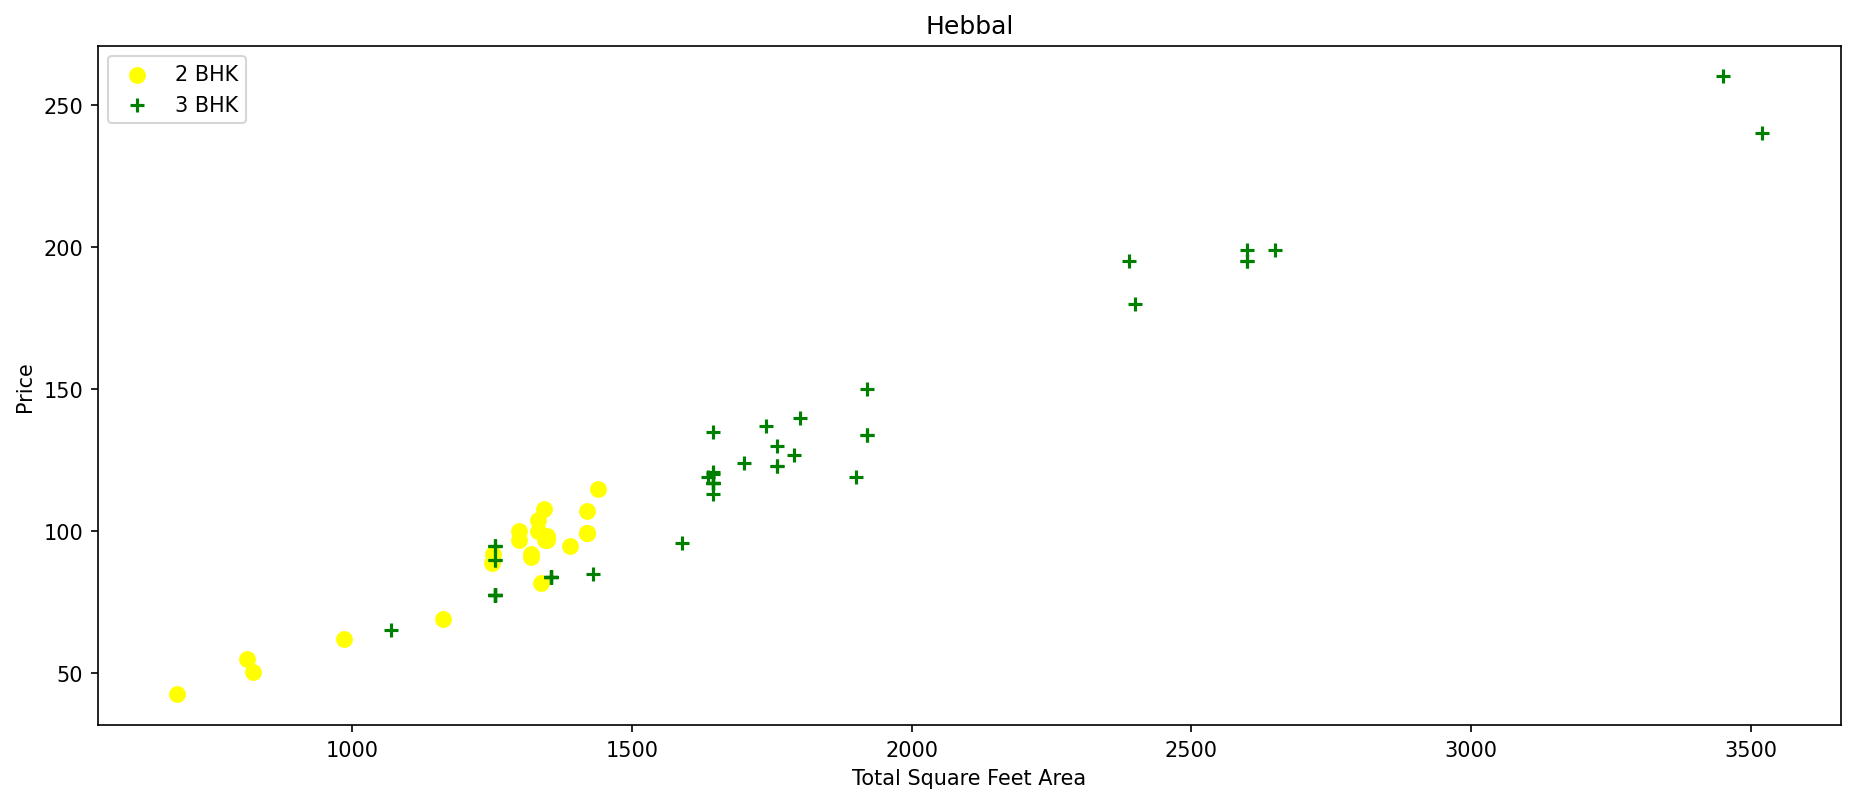

In [50]:
plot_scatter_chart(final_df1,'Hebbal')

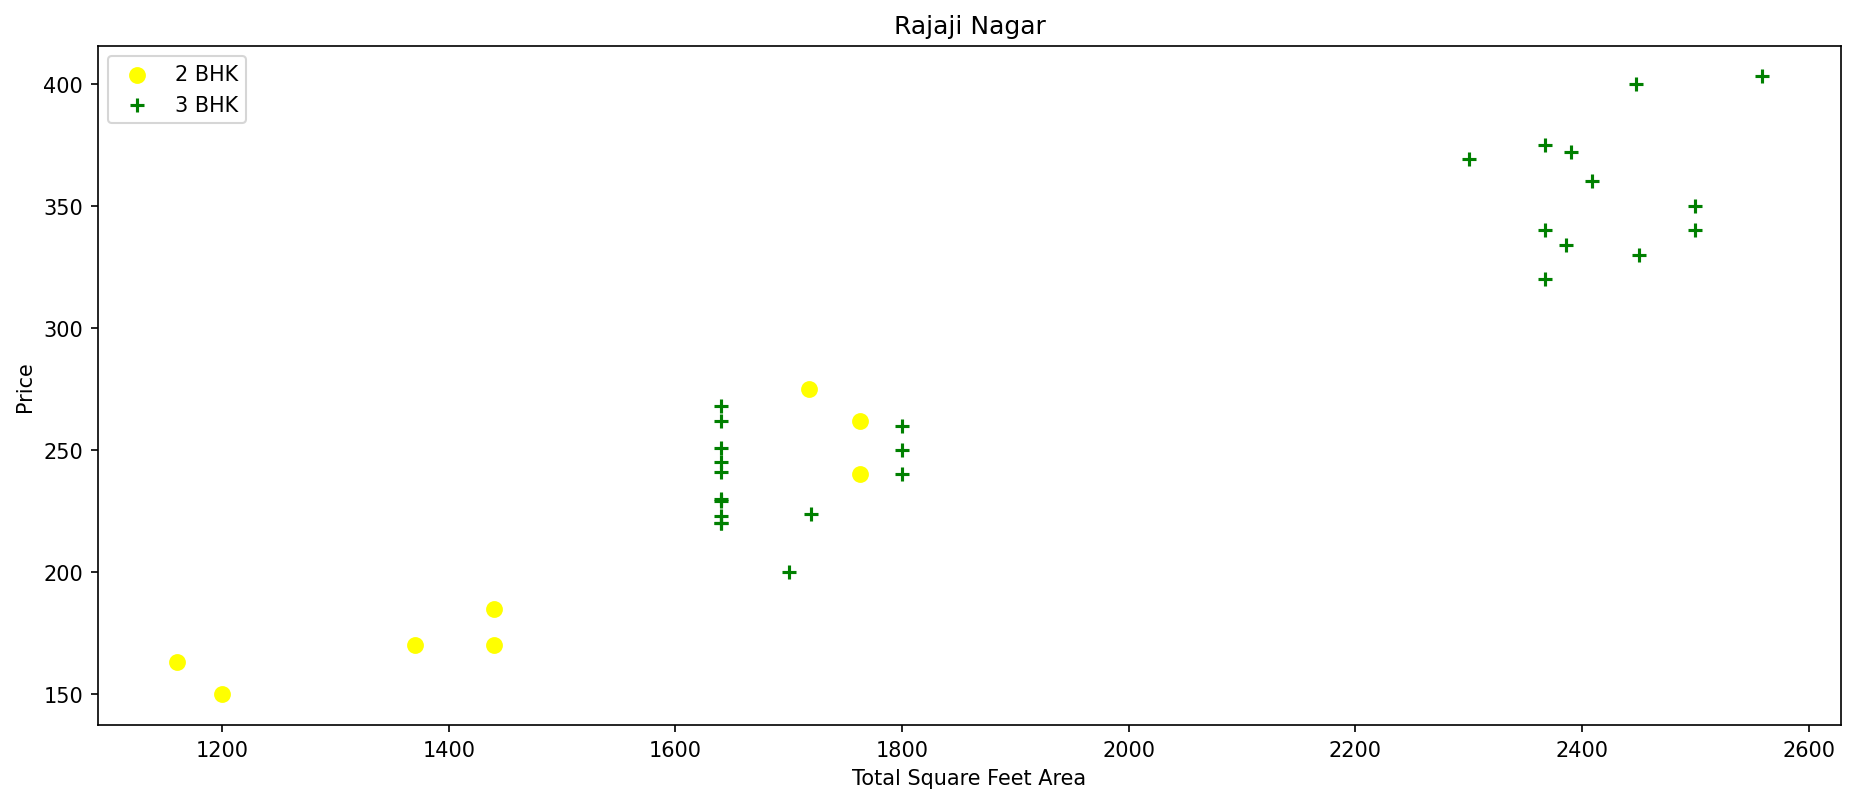

In [51]:
plot_scatter_chart(final_df1,'Rajaji Nagar')

In [52]:
final_df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000
1,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
2,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
3,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,4540.654699
4,Devarachikkanahalli,1230.0,2.0,1.0,58.00,2,4715.447154
...,...,...,...,...,...,...,...
6976,other,1095.0,2.0,1.0,57.00,2,5205.479452
6977,other,1256.0,2.0,1.0,65.00,2,5175.159236
6978,other,1353.0,2.0,2.0,110.00,2,8130.081301
6979,other,1440.0,2.0,2.0,63.93,3,4439.583333


Text(0, 0.5, 'Count')

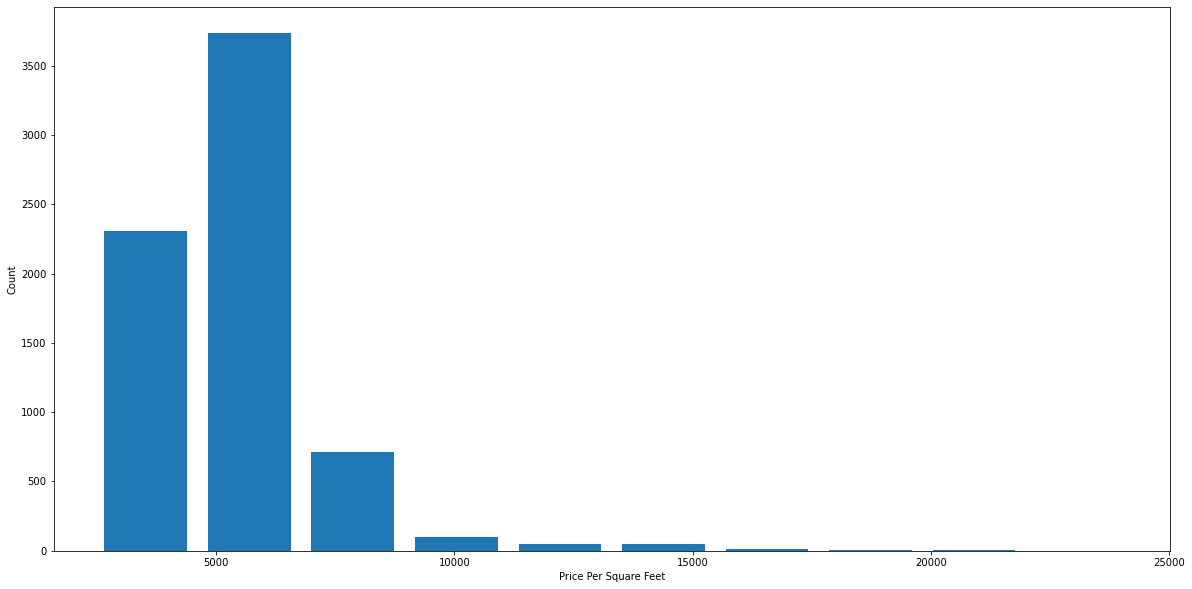

In [53]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(final_df1.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [54]:
final_df1['bath'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [55]:
final_df1[final_df1['bath']>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
3476,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
5706,other,10000.0,16.0,0.0,550.0,16,5500.000000
6519,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

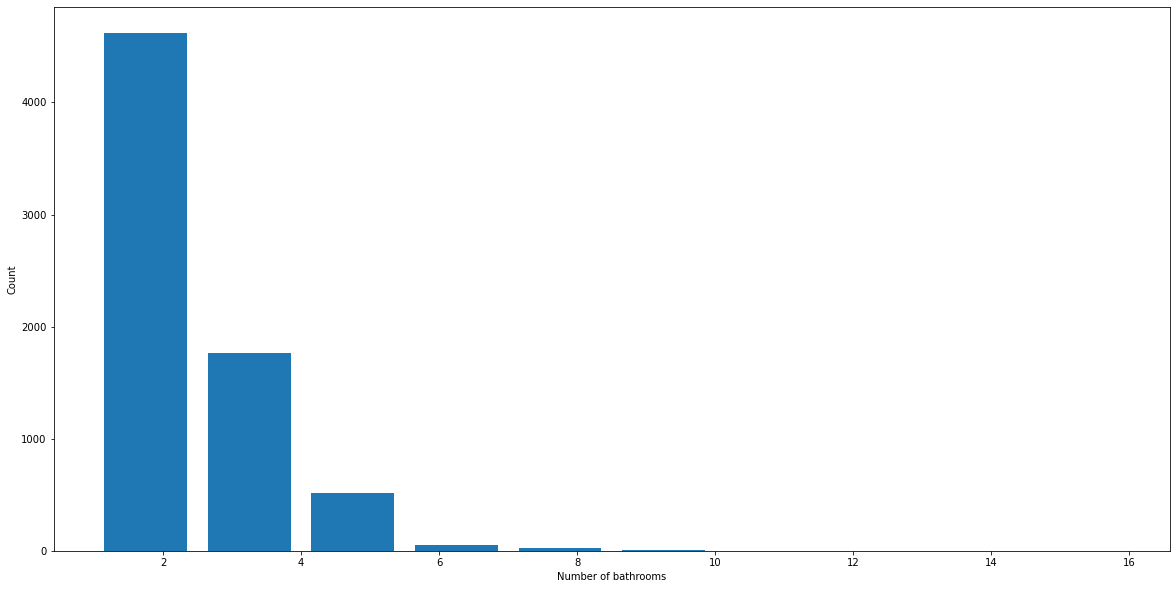

In [56]:
plt.hist(final_df1['bath'],rwidth=.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [57]:
model_df = final_df1.drop('price_per_sqft',axis=1)

In [58]:
model_df

,location,total_sqft,bath,balcony,price,bhk
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3
1,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2
2,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3
3,Devarachikkanahalli,947.0,2.0,2.0,43.00,2
4,Devarachikkanahalli,1230.0,2.0,1.0,58.00,2
...,...,...,...,...,...,...
6976,other,1095.0,2.0,1.0,57.00,2
6977,other,1256.0,2.0,1.0,65.00,2
6978,other,1353.0,2.0,2.0,110.00,2
6979,other,1440.0,2.0,2.0,63.93,3


In [59]:
dummies = pd.get_dummies(model_df.location,drop_first=True)

In [60]:
main_df = pd.concat([model_df,dummies],axis=1)

In [61]:
main_df

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1230.0,2.0,1.0,58.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6976,other,1095.0,2.0,1.0,57.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6977,other,1256.0,2.0,1.0,65.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6978,other,1353.0,2.0,2.0,110.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6979,other,1440.0,2.0,2.0,63.93,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
model_df.corr()['price']

total_sqft    0.818995
bath          0.617160
balcony       0.098535
price         1.000000
bhk           0.549801
Name: price, dtype: float64

In [63]:
# balcony is not affecting the price that much so I can drop it from feature set if I want to.

In [64]:
X = main_df.drop(['location','price'],axis=1)

In [65]:
y=main_df['price']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg.predict(X_test)
lr_reg.score(X_test,y_test)

0.9261523066502864

In [70]:
# A simple linear regression model is performing quite well here I can see. I am going tp try to imporeve thre result even more

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

In [72]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [73]:
def find_best_model_using_gridsearch_cv(X,y):


    algos={
        'linear_reg':{
            'model': LinearRegression(),
            'params':{

            }
        },
        'elasticnet':{
            'model':ElasticNet(),
            'params':{
                'alpha':[0.6,0.8,1,1.2],
                'l1_ratio':[.4,.6,.8,1],
                'max_iter':[10000]
            }
        },
        'r_sorest':{
            'model':RandomForestRegressor(random_state=101),
            'params':{
                'n_estimators':[64,90,128]}
        },
        'ada_boost':{
            'model':AdaBoostRegressor(random_state=101),
            'params':{

            }
        },
        'grad_boost':{
            'model':GradientBoostingRegressor(random_state=101),
            'params':{

            }
        },
        'svr':{
            'model': SVR(),
            'params':{
                'C':[0.01,0.1,1,5,10,100,1000],
                'gamma':['auto','scale']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(random_state=101),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    # Best model  with best params returning

    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=.2,random_state=101)
    for algo_name,config in algos.items():
        grid= GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        grid.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [74]:
find_best_model_using_gridsearch_cv(scaled_X_train,y_train)

,model,best_score,best_params
0,linear_reg,0.900709,{}
1,elasticnet,0.884359,"{'alpha': 0.6, 'l1_ratio': 1, 'max_iter': 10000}"
2,r_sorest,0.867830,{'n_estimators': 128}
3,ada_boost,0.645604,{}
4,grad_boost,0.861783,{}
5,svr,0.862462,"{'C': 1000, 'gamma': 'auto'}"
6,decision_tree,0.830185,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [75]:
lr_reg.fit(scaled_X_train,y_train)
unseen_test_result = lr_reg.predict(scaled_X_test)

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
rmse = np.sqrt(mean_squared_error(y_test,unseen_test_result))

In [78]:
rmse

20.80235314227956

In [79]:
mean_absolute_error(y_test,unseen_test_result)

11.632269596818277

In [80]:
lr_reg.score(scaled_X_test,y_test) # Standardization didn't provide better result. So in the final model pipeline I will drop feature scaling.

0.9261523066502838

In [81]:
main_df['price'].describe()

count    6981.000000
mean       82.173506
std        62.141889
min        10.000000
25%        50.000000
50%        65.000000
75%        90.000000
max       995.000000
Name: price, dtype: float64

In [91]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [98]:
import pickle
with open(r'C:\Users\knock\OneDrive\Desktop\banga\bangalore_house_price_predicting.pickle','wb') as f:
    pickle.dump(lr_reg,f)

In [99]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open(r'C:\Users\knock\OneDrive\Desktop\banga\columns.json','w') as f:
    f.write(json.dumps(columns))

NameError: name 'cwd' is not defined